In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [302]:
churn_data=pd.read_csv("./Data/churn.csv")

In [303]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn_data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [10]:
churn_data.shape

(7043, 21)

In [5]:
print(churn_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [60]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [61]:
churn_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
def dataoveriew(df, message):
    print(f'{message}')
    print(" \n")
    print('Number of rows: ', df.shape[0])
    print('\n')
    print("nNumber of features:", df.shape[1])
    print('\n')
    print("Data Features:")
    print(df.columns.to_list())
    print('\n')
    print("nMissing values:", df.isnull().sum().values.sum())
    print('\n')
    print("nUnique values:")
    print(df.nunique())

dataoveriew(churn_data, 'Overview of the dataset')

Overview of the dataset
 

Number of rows:  7043


nNumber of features: 21


Data Features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


nMissing values: 0


nUnique values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


## Observation


The dataset has 7043 rows and 21 columns. 

There are 17 categorical features:

CustomerID: Customer ID unique for each customer

gender: Whether the customer is a male or a female

SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)

Partner: Whether the customer has a partner or not (Yes, No)

Dependent: Whether the customer has dependents or not (Yes, No)

PhoneService: Whether the customer has a phone service or not (Yes, No)

MultipeLines: Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService: Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)

DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract: The contract term of the customer (Month-to-month, One year, Two years)

PaperlessBilling: The contract term of the customer (Month-to-month, One year, Two years)

PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card 
(automatic)
--------------------------------------------------------------------------------------------------------------------------------------
Next, there are 3 numerical features:

Tenure: Number of months the customer has stayed with the company

MonthlyCharges: The amount charged to the customer monthly

TotalCharges: The total amount charged to the customer

Finally, there’s a prediction feature:

Churn: Whether the customer churned or not (Yes or No)

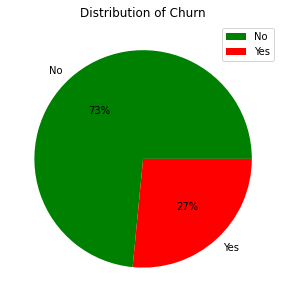

In [67]:
target_instance = churn_data["Churn"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
plt.figure(figsize=(10,5))
plt.pie(target_instance['Churn'],labels=target_instance['Category'],colors=['green','red'],autopct='%1.0f%%')
plt.legend()
plt.title('Distribution of Churn')
plt.show()

# Ploting Bar Graph for all Categorical Data

In [24]:
def bar_plot(category,churn_data=churn_data):
    x=[category,'Churn']
    dt=churn_data[x].value_counts().to_frame().reset_index().rename(columns={0: 'values'})
    dt.pivot(index=category, columns='Churn', values='values').plot(kind='bar')
    plt.plot()

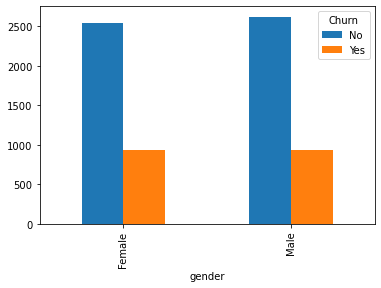

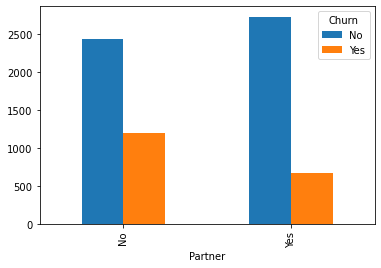

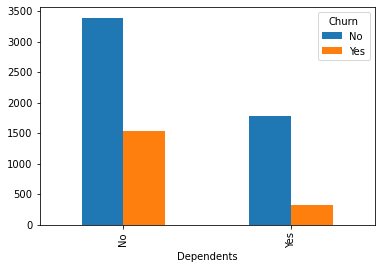

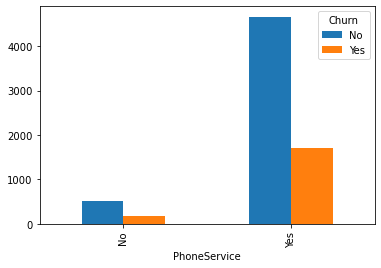

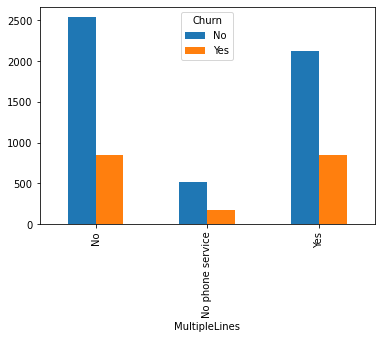

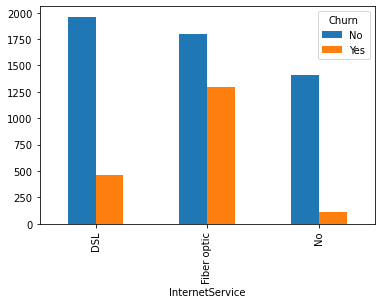

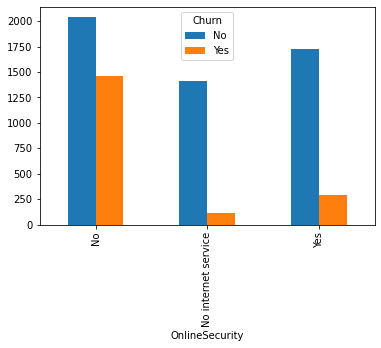

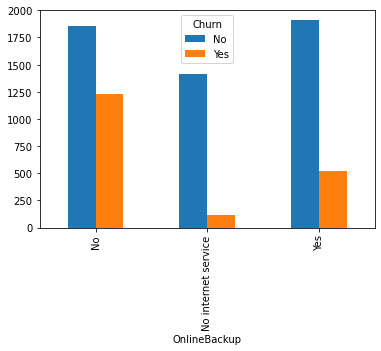

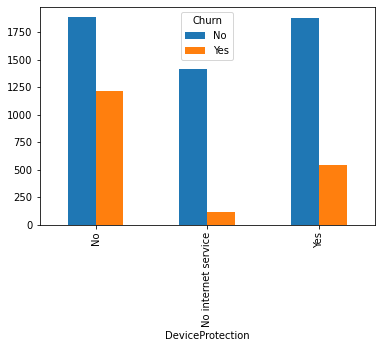

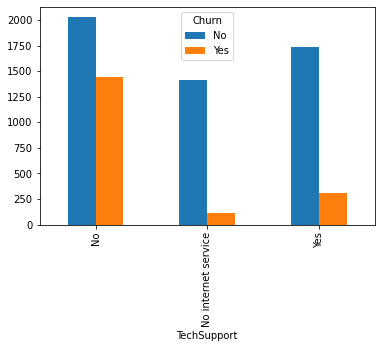

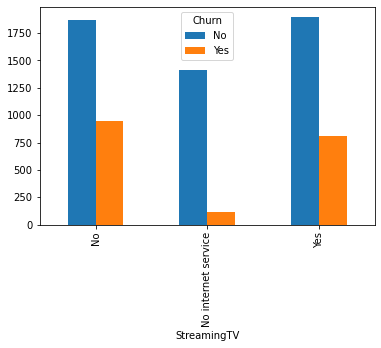

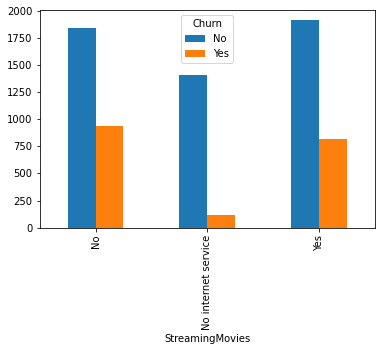

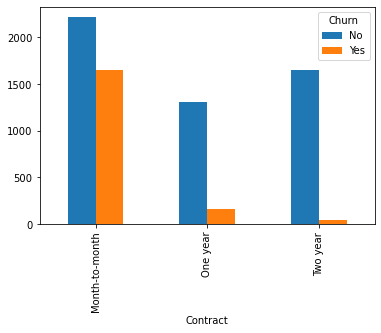

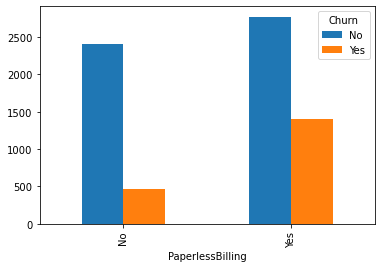

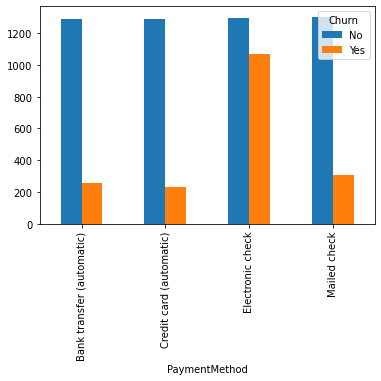

In [66]:
for i in range(1,len(churn_data.dtypes)-1):
    if churn_data.dtypes[i] =='object':
        bar_plot(churn_data.columns[i])

[]

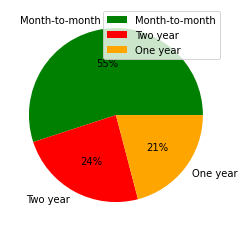

In [10]:
Contract_data=churn_data['Contract'].value_counts().to_frame().reset_index()
Contract_data.rename(columns={'index':'ctegory'},inplace=True)
plt.pie(Contract_data['Contract'],labels=Contract_data['ctegory'],colors=['green','red','orange'],autopct='%1.0f%%')
plt.legend()
plt.plot()

[]

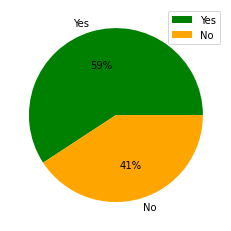

In [11]:
PaperlessBilling_data=churn_data['PaperlessBilling'].value_counts().to_frame().reset_index()
PaperlessBilling_data.rename(columns={'index':'category'},inplace=True)
plt.pie(PaperlessBilling_data['PaperlessBilling'],labels=PaperlessBilling_data['category'],colors=['green','orange'],autopct='%1.0f%%')
plt.legend()
plt.plot()

## Payment insights:
The shorter the contract, the higher the churn rate. Those with more extended plans face additional barriers 
when canceling early. This clearly explains the motivation for companies to have long-term relationships with their customers. 
Churn Rate is higher for the customers who opted for paperless billing. About 59.2% of customers use paperless billing. 
Customers who pay with electronic checks are more likely to churn, and this kind of payment is more common than other payment types.

# Converting Total Charges from Object to Float as it has Numberical values

In [304]:
for i in range(len(churn_data['TotalCharges'])):
    if len(churn_data['TotalCharges'][i].split(' ')) !=1:
        churn_data['TotalCharges'][i]=None
churn_data['TotalCharges']=churn_data['TotalCharges'].astype(float)
#Filling th Null values
churn_data['TotalCharges'].fillna(churn_data['TotalCharges'].mean(),inplace=True)

C:\Users\Om\AppData\Local\Temp/ipykernel_16440/1725152420.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data['TotalCharges'][i]=None


# observing the distribution of the Numerical Data

In [305]:
for i in range(len(churn_data.dtypes)):
    if churn_data.dtypes[i] != 'object':
        print(churn_data.columns[i])

SeniorCitizen
tenure
MonthlyCharges
TotalCharges


In [306]:
def bar_distribu_chart(column,data=churn_data):
    sns.histplot(data=data, x=column, hue='Churn', multiple='stack', kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column} by Churn Status')
    plt.show()

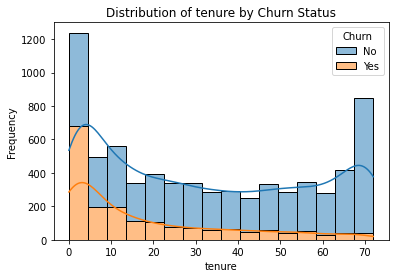

In [307]:
bar_distribu_chart('tenure')

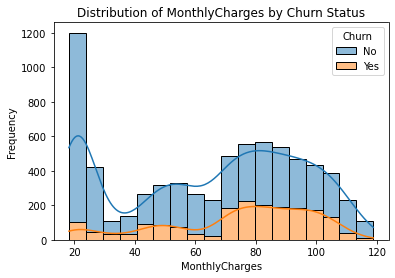

In [308]:
bar_distribu_chart('MonthlyCharges')

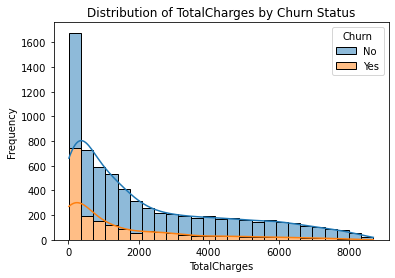

In [309]:
bar_distribu_chart('TotalCharges')

## Customer account information insight: 
The tenure histogram is rightly skewed and shows that most customers have been with
the telecom company for just the first few months (0-9 months). The highest rate of churn is also in the first few months 
(0-9months). 75% of customers who end up leaving the Telco company do so within their first 30 months. 
The monthly charge histogram shows that clients with higher monthly charges have a higher churn rate. 
This suggests that discounts and promotions can be an enticing reason for customers to stay.

In [21]:
#Create an empty dataframe
bin_df = pd.DataFrame()

#Update the binning dataframe
bin_df['tenure_bins'] =  pd.qcut(churn_data['tenure'], q=3, labels= ['low', 'medium', 'high'])
bin_df['Churn'] = churn_data['Churn']

In [22]:
bin_df['tenure_bins'][200]

'medium'

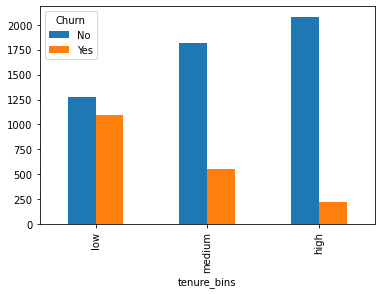

In [25]:
bar_plot('tenure_bins',churn_data=bin_df)

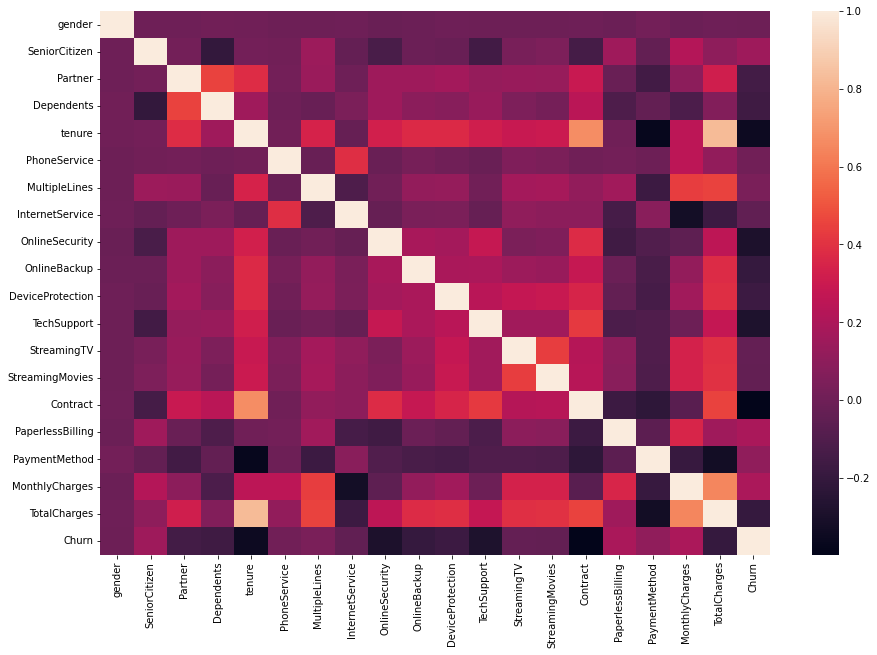

In [76]:
# Checking the correlation between features
corr = churn_data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr)
plt.show()

Correlation measures the linear relationship between two variables. Features with high correlation are more linearly dependent 
and have almost the same effect on the dependent variable. So, when two features have a high correlation, we can drop one of 
them. In our case, we can't find any such correlation so we are not dropping it.

# DataPreprocessing

In [310]:
# The customerID column isnt useful as the feature is used for identification of customers. 
churn_data.drop(["customerID"],axis=1,inplace = True)

In [311]:
# Encode categorical features

#Defining the map function
def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})

## Encoding target feature
churn_data['Churn'] = churn_data[['Churn']].apply(binary_map)

# Encoding gender category
churn_data['gender'] = churn_data['gender'].map({'Male':1, 'Female':0})

#Encoding other binary category
binary_list = [ 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
churn_data[binary_list] = churn_data[binary_list].apply(binary_map)

In [170]:
#Encoding the other categoric features with more than two categories
#churn_data=pd.get_dummies(churn_data)

In [312]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in churn_data.columns:
    if churn_data[i].dtype == 'object':
        churn_data[i]=lb.fit_transform(churn_data[i])
        import pickle
        output = open(f'{i}_Lable_Encoder.pkl', 'wb')
        pickle.dump(lb, output)
        output.close()

In [313]:
# converting space and brachets and other sybolm in readble format
new_columns=[col.replace(' ','').replace('-','_').replace('(','_').replace(')','') for col in churn_data]
churn_data.columns=new_columns

In [314]:
# Let’s use the generalized linear model (GLM) to gain some statistics of the respective features with the target.
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [315]:
glm_columns = [e for e in new_columns if e not in ['customerID', 'Churn']]
glm_columns = ' + '.join(map(str, glm_columns))


In [316]:
glm_columns=' + '.join(new_columns)

In [317]:
#Fiting it to the Generalized Linear Model
#Prepare it for the GLM formula
glm_columns = [e for e in new_columns if e not in ['customerID', 'Churn']]
glm_columns = ' + '.join(map(str, glm_columns))
glm_model = smf.glm(formula=f'Churn ~ {glm_columns}', data=churn_data, family=sm.families.Binomial())
res = glm_model.fit()

In [318]:
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                            GLM   Df Residuals:                     7023
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2929.2
Date:                Wed, 31 Jul 2024   Deviance:                       5858.5
Time:                        16:40:04   Pearson chi2:                 8.13e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.5306      0.186  

In [319]:
#feature scaling and making pickel file
import pickle
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
churn_data['tenure'] = sc.fit_transform(churn_data[['tenure']])
s='tenure'
output = open(f'{s}_standard_scaler.pkl', 'wb')
pickle.dump(sc, output)
output.close()
churn_data['MonthlyCharges'] = sc.fit_transform(churn_data[['MonthlyCharges']])
s='MonthlyCharges'
output = open(f'{s}_standard_scaler.pkl', 'wb')
pickle.dump(sc, output)
output.close()
churn_data['TotalCharges'] = sc.fit_transform(churn_data[['TotalCharges']])
s='TotalCharges'
output = open(f'{s}_standard_scaler.pkl', 'wb')
pickle.dump(sc, output)
output.close()

In [320]:
# Model Deployement
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score
x_churn_data=churn_data.drop('Churn',axis=1)
y_churn_data=churn_data['Churn']

In [321]:
from imblearn.over_sampling import SMOTE
ov=SMOTE()
x_churn_data,y_churn_data=ov.fit_resample(x_churn_data,y_churn_data)

In [322]:
x_train,x_test,y_train,y_test=train_test_split(x_churn_data,y_churn_data,random_state=123,stratify=y_churn_data,test_size=0.2)

In [323]:
#Defining the modelling function
def modeling(alg, alg_name):
    model = alg() #Instantiating the algorithm class and unpacking parameters if any
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    #return model

In [324]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
log_model = modeling(LogisticRegression, 'Logistic Regression')

Logistic Regression
accuracy:  0.7888888888888889
precision:  0.7586505190311419
recall:  0.8473429951690822
f1_score:  0.7881650738280747


In [110]:
from sklearn.svm import SVC
svc_model = modeling(SVC, 'SVC Classification')

SVC Classification
accuracy:  0.793719806763285
precision:  0.7602739726027398
recall:  0.8579710144927536
f1_score:  0.7928647071822791


In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")

Random Forest Classification
accuracy:  0.8420289855072464
precision:  0.8183453237410072
recall:  0.8792270531400966
f1_score:  0.841810098736355


In [68]:
#Decision tree
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

Decision Tree Classification
accuracy:  0.7618357487922706
precision:  0.760576923076923
recall:  0.7642512077294686
f1_score:  0.7618343592286823


In [52]:
#Naive bayes 
nb_model = modeling(GaussianNB, "Naive Bayes Classification")

{}
Naive Bayes Classification
accuracy:  0.7613526570048309
precision:  0.7408726625111309
recall:  0.8038647342995169
f1_score:  0.7609205743255566


In [184]:
from xgboost import XGBClassifier
nb_model = modeling(XGBClassifier,"XGBoost Classifire")

XGBoost Classifire
accuracy:  0.8256038647342995
precision:  0.7977031802120141
recall:  0.8724637681159421
f1_score:  0.8252200741388533


In [202]:
from sklearn.ensemble import RandomForestClassifier
rnf=RandomForestClassifier(n_estimators=10)
rnf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [203]:
#Importing Pickel File of RandomForest
import pickle
folder=open('RnadomForest_model.pkl','wb')
pickle.dump(rnf,folder)
folder.close()

# Testing Our Data

In [325]:
test_data=pd.read_csv('./Data/batch_churn.csv')

In [326]:
test_data['DeviceProtection']

0                    Yes
1                     No
2    No internet service
3                    Yes
4                    Yes
Name: DeviceProtection, dtype: object

In [327]:
test_data.drop('customerID',axis=1,inplace=True)
test_data.drop('Unnamed: 20',axis=1,inplace=True)

In [328]:
# Encode categorical features

#Defining the map function
def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})

## Encoding target feature
#test_data['Churn'] = test_data[['Churn']].apply(binary_map)

# Encoding gender category
test_data['gender'] = test_data['gender'].map({'Male':1, 'Female':0})

#Encoding other binary category
binary_list = [ 'SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
test_data[binary_list] = test_data[binary_list].apply(binary_map)

In [329]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in test_data.columns:
    if test_data[i].dtype == 'object':
        lableEncode=pickle.load(open(f'{i}_Lable_Encoder.pkl','rb'))
        test_data[i]=lableEncode.transform(test_data[i])
        print(i,'Done')

MultipleLines Done
InternetService Done
OnlineSecurity Done
OnlineBackup Done
DeviceProtection Done
TechSupport Done
StreamingTV Done
StreamingMovies Done
Contract Done
PaymentMethod Done


In [330]:
std=pickle.load(open('tenure_standard_scaler.pkl','rb'))
test_data['tenure'] = std.transform(test_data[['tenure']])
std=pickle.load(open('MonthlyCharges_standard_scaler.pkl','rb'))
test_data['MonthlyCharges'] = std.transform(test_data[['MonthlyCharges']])
std=pickle.load(open('TotalCharges_standard_scaler.pkl','rb'))
test_data['TotalCharges'] = std.transform(test_data[['TotalCharges']])

In [331]:
model=pickle.load(open('./RnadomForest_model.pkl','rb'))
pred=model.predict(test_data)

In [332]:
test_data['Churn']=pred

In [333]:
test_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,-1.073843,1,2,0,2,2,2,2,2,2,0,1,2,-1.487697,-0.992697,1
1,0,0,0,1,-1.277445,1,0,1,0,0,0,0,2,0,0,1,2,0.506459,-0.968413,1
2,1,0,0,0,-1.114563,1,0,2,1,1,1,1,1,1,0,0,3,-1.487697,-0.957375,0
3,0,1,1,1,-0.300156,1,0,1,0,2,2,0,2,0,1,1,2,1.171178,0.095680,0
4,1,0,1,0,1.450820,1,2,1,0,2,2,2,2,2,2,1,0,1.736189,-0.743232,0


In [285]:
std=pickle.load(open('MonthlyCharges_standard_scaler.pkl','rb'))
x = std.transform(test_data[)

C:\Users\Om\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [293]:
[test_data["MonthlyCharges"][0]]

[20]

In [295]:
[test_data['MonthlyCharges']]

[0     20
 1     80
 2     20
 3    100
 4    117
 Name: MonthlyCharges, dtype: int64]